# AdEx Network
Use numpy only to build the network

Set the path for the verilog

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# units and constants
Unified as a standard unit

In [26]:
ms=1e-3
mV=1e-3
mA=1e-3
nA=1e-9
pA=1e-12
nS=1e-9
pF=1e-12
# whole world time
tick_time=0
# minium gap time
dt=0.1*ms
# total time
TotTime=4000*ms

# AdEx neuron model
define its characteristic parameter

In [27]:
class AdExNeuron:
    def __init__(self, V_Neuron, w_adaptive, G_Synapsis_Excitatory, G_Synapsis_Inhibitory, 
                 E_Excitatory, E_Inhibitory, E_local, G_local, V_disturb, V_Excitatory_Threshold,C_Membrane, 
                 a_w_adaptive, tau_w_adaptive,
                 tau_Synapsis,
                 V_Reset_Threshold, V_Reset, b_w_adaptive,
                 I_Synapsis, T_refractory, T_rest
                 ):
        # variable parameters
        self.V_Neuron = V_Neuron
        self.w_adaptive = w_adaptive
        self.G_Synapsis_Excitatory = G_Synapsis_Excitatory
        self.G_Synapsis_Inhibitory = G_Synapsis_Inhibitory
        # fixed parameters
        self.E_Excitatory = E_Excitatory
        self.E_Inhibitory = E_Inhibitory
        self.E_local = E_local
        self.G_local = G_local
        self.V_disturb = V_disturb
        self.V_Excitatory_Threshold = V_Excitatory_Threshold
        self.C_Membrane = C_Membrane
        self.T_refractory = T_refractory
        # adaptive parameters
        self.a_w_adaptive = a_w_adaptive
        self.tau_w_adaptive = tau_w_adaptive
        self.tau_Synapsis = tau_Synapsis
        # reset parameters
        self.V_Reset_Threshold = V_Reset_Threshold
        self.V_Reset = V_Reset
        self.b_w_adaptive = b_w_adaptive
        self.I_Synapsis = I_Synapsis
        self.T_rest = T_rest
    def refresh_membrane_potential(self):
        if self.T_rest<=0:
            self.V_Neuron =self.V_Neuron+dt*(self.G_Synapsis_Excitatory*(self.E_Excitatory-self.V_Neuron)+
                                        self.G_Synapsis_Inhibitory*(self.E_Inhibitory-self.V_Neuron)+
                                        self.G_local*(self.E_local-self.V_Neuron)+
                                        self.G_local*self.V_disturb*np.exp((self.V_Neuron-self.V_Excitatory_Threshold)/self.V_disturb)-
                                        self.w_adaptive+self.I_Synapsis
                                        )/self.C_Membrane  
            # print(self.V_Neuron)
        else:
            self.T_rest=self.T_rest-dt
    def refresh_w_adaptive(self):
        if self.T_rest<=0:
            self.w_adaptive = self.w_adaptive+dt*(self.a_w_adaptive*(self.V_Neuron-self.E_local)-self.w_adaptive)/self.tau_w_adaptive
    def refresh_G_Synapsis_Excitatory(self):
        if self.T_rest<=0:
            self.G_Synapsis_Excitatory = self.G_Synapsis_Excitatory-dt*self.G_Synapsis_Excitatory/self.tau_Synapsis
    def refresh_G_Synapsis_Inhibitory(self):
        if self.T_rest<=0:
            self.G_Synapsis_Inhibitory = self.G_Synapsis_Inhibitory-dt*self.G_Synapsis_Inhibitory/self.tau_Synapsis
    def fire(self):
        if self.V_Neuron>self.V_Reset_Threshold:
            self.V_Neuron = self.V_Reset
            self.w_adaptive = self.w_adaptive+self.b_w_adaptive
            self.T_rest=self.T_refractory
        else:
            pass

In [28]:
# initialize single neuron
# Fast_Spiking_neuron=AdExNeuron(-65*mV, 0.0*pA, 0.0*nS, 0.0*nS, 
#                                0.0*mV, -80*mV, -65*mV, 10*nS, 0.5*mV, -48*mV, 200*pF,
#                                0.0*nS, 1.0*ms, 
#                                5.0*ms,
#                                -47.5*mV, -65*mV, 0.0*pA,
#                                0*pA, 5*ms, 0*ms)
# Regular_Spiking_neuron=AdExNeuron(-65*mV, 0.0*pA, 0.0*nS, 0.0*nS, 
#                                0.0*mV, -80*mV, -65*mV, 10*nS, 2*mV, -50*mV, 200*pF,
#                                0.0*nS, 1000.0*ms, 
#                                5.0*ms,
#                                -47.5*mV, -65*mV, 0.0*pA,
#                                0*pA, 5*ms, 0*ms)

In [29]:
Fast_Spiking_neuron=AdExNeuron(V_Neuron=-65*mV, w_adaptive=0.0*pA, G_Synapsis_Excitatory=0.0*nS, G_Synapsis_Inhibitory=0.0*nS,
                                E_Excitatory=0.0*mV, E_Inhibitory=-80*mV, E_local=-65*mV, G_local=10*nS, V_disturb=0.5*mV, V_Excitatory_Threshold=-48*mV, C_Membrane=200*pF,
                                a_w_adaptive=0.0*nS, tau_w_adaptive=1.0*ms,
                                tau_Synapsis=5.0*ms,
                                V_Reset_Threshold=-47.5*mV, V_Reset=-65*mV, b_w_adaptive=0.0*pA,
                                I_Synapsis=0.0*pA, T_refractory=5*ms, T_rest=0*ms)
Regular_Spiking_neuron=AdExNeuron(V_Neuron=-65*mV, w_adaptive=0.0*pA, G_Synapsis_Excitatory=0.0*nS, G_Synapsis_Inhibitory=0.0*nS,
                                E_Excitatory=0.0*mV, E_Inhibitory=-80*mV, E_local=-65*mV, G_local=10*nS, V_disturb=2*mV, V_Excitatory_Threshold=-50*mV, C_Membrane=200*pF,
                                a_w_adaptive=0.0*nS, tau_w_adaptive=1000.0*ms,
                                tau_Synapsis=5.0*ms,
                                V_Reset_Threshold=-47.5*mV, V_Reset=-65*mV, b_w_adaptive=0.0*pA,
                                I_Synapsis=0.0*pA, T_refractory=5*ms, T_rest=0*ms)

le

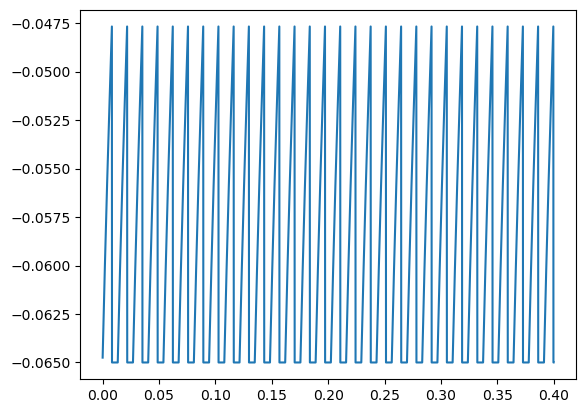

In [30]:
# 单个神经元采用恒流输入进行测试
Single_Spiking_neuron=AdExNeuron(V_Neuron=-65*mV, w_adaptive=0.0*pA, G_Synapsis_Excitatory=0.0*nS, G_Synapsis_Inhibitory=0.0*nS,
                                E_Excitatory=0.0*mV, E_Inhibitory=-80*mV, E_local=-65*mV, G_local=10*nS, V_disturb=2*mV, V_Excitatory_Threshold=-50*mV, C_Membrane=200*pF,
                                a_w_adaptive=0.0*nS, tau_w_adaptive=1000.0*ms,
                                tau_Synapsis=5.0*ms,
                                V_Reset_Threshold=-47.5*mV, V_Reset=-65*mV, b_w_adaptive=0.0*pA,
                                I_Synapsis=0.5*nA, T_refractory=5*ms, T_rest=0*ms)
single_membrane_potential=[]
for tick_time in np.arange(0, TotTime/10, dt):
# for tick_time in np.arange(0, 100*dt, dt):
    # refresh the membrane potential
    Single_Spiking_neuron.refresh_membrane_potential()
    # refresh the adaptive parameters
    Single_Spiking_neuron.refresh_w_adaptive()
    # refresh the excitatory synapsis
    Single_Spiking_neuron.refresh_G_Synapsis_Excitatory()
    # refresh the inhibitory synapsis
    Single_Spiking_neuron.refresh_G_Synapsis_Inhibitory()
    # fire the neuron
    Single_Spiking_neuron.fire()
    # record the membrane potential
    single_membrane_potential.append(Single_Spiking_neuron.V_Neuron)
plt.plot(np.arange(0, TotTime/10, dt), single_membrane_potential)
# plt.plot(np.arange(0, 100*dt, dt), single_membrane_potential)